# 서울 구별 CCTV 현황 분석
 - 구별 CCTV 수 파악
 - 구별 인구수 -> 인구대비 CCTV 비율 --> 평균대비 낮은 구 확인
 - 시각화
 
 - ※ Pandas 사용법

In [2]:
import pandas as pd

### 1. CCTV 

In [3]:
# 데이터 불러오기   from   http://data.seoul.go.kr/ 서울 열린데이터광장

In [4]:
CCTV_Seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv',  encoding='utf-8')
# 파일경로 위치 확인 필요   ../  Vs  ./ 
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
CCTV_Seoul.columns = ['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [7]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
# 데이터 살펴보기

In [9]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [10]:
# CCTV 증가율 넣기... ????

In [11]:
# 교재버전
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [12]:
# 함수로 만들기
def growing(x):
    return (x[3]+x[4]+x[5])/x[2] *100

CCTV_Seoul['최근증가율'] = CCTV_Seoul.apply(growing, axis=1)
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [13]:
# 람다 함수로 만들기
CCTV_Seoul.apply(lambda x: (x[3]+x[4]+x[5])/x[2] * 100, axis = 1)
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


### 2. 서울시 인구현황

In [14]:
# 데이터 불러오기

In [15]:
pop_Seoul = pd.read_excel('./data/01. population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [16]:
pop_Seoul = pd.read_excel('./data/01. population_in_Seoul.xls',
                         header = 2, # 행 번호 header 기준 지정. 기본값 0, 없을경우 None 으로 입력
                         encoding='utf-8')
                        # 교재에서는 parse_cols = 'B,D,G,J,N'  옵션 사용하여 B,D,G,J,N 열만 가지고옴
pop_Seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2017.1/4,합계,4202888.0,10197604.0,5000005.0,5197599.0,9926968.0,4871560.0,5055408.0,270636.0,128445.0,142191.0,2.36,1321458.0
1,2017.1/4,종로구,72654.0,162820.0,79675.0,83145.0,153589.0,75611.0,77978.0,9231.0,4064.0,5167.0,2.11,25425.0
2,2017.1/4,중구,59481.0,133240.0,65790.0,67450.0,124312.0,61656.0,62656.0,8928.0,4134.0,4794.0,2.09,20764.0
3,2017.1/4,용산구,106544.0,244203.0,119132.0,125071.0,229456.0,111167.0,118289.0,14747.0,7965.0,6782.0,2.15,36231.0
4,2017.1/4,성동구,130868.0,311244.0,153768.0,157476.0,303380.0,150076.0,153304.0,7864.0,3692.0,4172.0,2.32,39997.0


In [17]:
pop_Seoul.columns

Index(['기간', '자치구', '세대', '계', '남자', '여자', '계.1', '남자.1', '여자.1', '계.2',
       '남자.2', '여자.2', '세대당인구', '65세이상고령자'],
      dtype='object')

In [18]:
# 구별 인구수 / 한국인수 / 외국인수 / 고령자수 만 가져오기

# pd.loc[행이름,열이름]  Vs  pd.iloc[행index, 열index]

Check = pop_Seoul.loc[:,['자치구','계','계.1','계.2','65세이상고령자']]
# Check = pop_Seoul.iloc[:,[1,3,6,9,-1]]

Check.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [19]:
pop_Seoul = pop_Seoul.loc[:,['자치구','계','계.1','계.2','65세이상고령자']]
pop_Seoul.columns = ['구별','인구수','한국인','외국인','고령자']

# pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
#                           pop_Seoul.columns[1] : '인구수', 
#                           pop_Seoul.columns[2] : '한국인', 
#                           pop_Seoul.columns[3] : '외국인', 
#                           pop_Seoul.columns[4] : '고령자'}, inplace=True)


pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [20]:
# 살펴보기

In [21]:
pop_Seoul.drop(0, inplace=True)  # 0번 행렬 "합계" 삭제하기
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [22]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan], dtype=object)

In [23]:
pop_Seoul['구별'].notnull()

1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
Name: 구별, dtype: bool

In [24]:
# dropna로 선택
pop_Seoul.dropna(subset=['구별'], axis=0, inplace = True)

#notnull로 선택
pop_Seoul= pop_Seoul[pop_Seoul['구별'].notnull()]

# 교재 방법
# pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [25]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] *100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] *100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


### 3. CCTV 데이터 + 인구데이터

In [26]:
#데이터 합치기
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [27]:
# 불필요할 한 열 삭제
data_result.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근증가율', '인구수',
       '한국인', '외국인', '고령자', '외국인비율', '고령자비율'],
      dtype='object')

In [29]:
data_result = data_result[['구별', '소계', '최근증가율', '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율']]
# del 활용 가능:  del data_result[열 이름]

In [30]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [ ]:
# index 만들어주기

In [34]:
data_result.index = data_result['구별']  # '구별' 값과 동일하게 인덱스 변경
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
강남구,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [35]:
data_result.set_index('구별', inplace=True)    # '구별' 열을 인덱스로 설정

data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [36]:
# 변수간 관계 살펴보기: 상관관계

In [37]:
import numpy as np

In [38]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [40]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [41]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[ 1.        ,  0.30634228],
       [ 0.30634228,  1.        ]])

In [39]:
# Pandas 에서 변수간 상관계수 구하기  (연속형만 가능)
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
최근증가율,-0.343016,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.306342,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.136074,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.280786,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


In [42]:
# 인구수와 CCTV 상관관계 있음?

In [43]:
data_result.sort_values(by='인구수', ascending=False).head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
성북구,1464,63.627354,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


### 4. 시각화

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

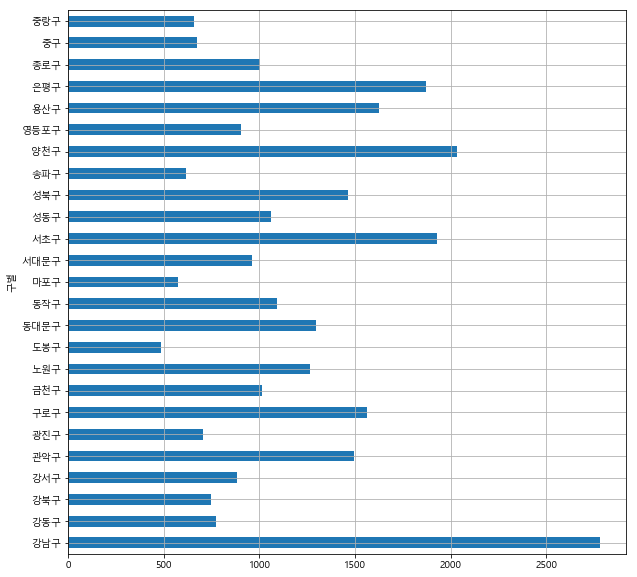

In [48]:
data_result['소계'].plot(kind='barh',grid=True, figsize=(10,10))

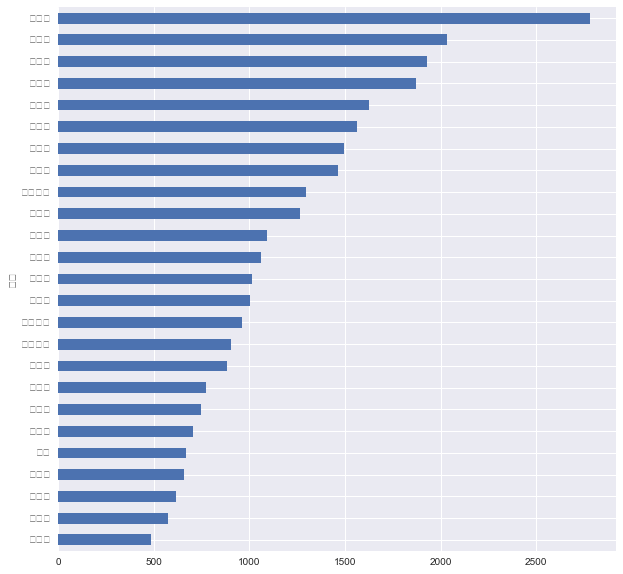

In [52]:
data_result['소계'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))